In [5]:
import torch
import pandas as pd
# import numpy as np
from torch.autograd import Variable
# from numpy.random import randint
# from sklearn import metrics

trainData = pd.read_csv('ml100k.train.rating', header=None, names=['user', 'item', 'rate'], sep='\t')
testData = pd.read_csv('ml100k.test.rating', header=None, names=['user', 'item', 'rate'], sep='\t')

userIdx = trainData.user.values
itemIdx = trainData.item.values
rates = trainData.rate.values

K = 20
lambd = 0.00001
learning_rate = 1e-6

# 创建用户张量
U = torch.randn([len(set(userIdx)), K], requires_grad=True)
# 创建Item张量
P = torch.randn([len(set(itemIdx)), K], requires_grad=True)

# torch.mm(U, P.t()) 执行了矩阵乘法操作，将 U 和 P 进行乘法运算，得到形状为 [用户数量, 物品数量] 的二维张量。
# 结果被赋值给变量 R，它表示了用户对物品的预测评分矩阵。
# P.t() 表示将 P 进行转置操作，得到形状为 [K, 物品数量] 的二维张量。
R = torch.mm(U, P.t())
ratesPred = torch.gather(R.view(1, -1)[0], 0, Variable(torch.LongTensor(userIdx * len(set(itemIdx)) + itemIdx)))
diff_op = ratesPred - Variable(torch.FloatTensor(rates))
baseLoss = diff_op.pow(2).sum()

# regularizer = lambd* (U.abs().sum()+P.abs().sum())
regularizer = lambd * (U.pow(2).sum() + P.pow(2).sum())
loss = baseLoss + regularizer

# optimizer = torch.optim.Adam([U,P], lr = learning_rate)
optimizer = torch.optim.SGD([U, P], lr=learning_rate, momentum=0.9)
print('Training')
for i in range(250):
    loss.backward()
    optimizer.step()
    R = torch.mm(U, P.t())
    if i % 50 == 0:
        print('loss:', loss.data.numpy())
    ratesPred = torch.gather(R.view(1, -1)[0], 0, Variable(torch.LongTensor(userIdx * len(set(itemIdx)) + itemIdx)))
    diff_op = ratesPred - Variable(torch.FloatTensor(rates))
    baseLoss = diff_op.pow(2).mean()  # torch.abs()
    # baseLoss = torch.sum(diff_abs)
    # regularizer = lambd* (U.abs().sum()+P.abs().sum())
    regularizer = lambd * (U.pow(2).sum() + P.pow(2).sum())
    loss = baseLoss + regularizer


def getMAE():
    userIdx = testData.user.values
    itemIdx = testData.item.values
    rates = testData.rate.values
    R = torch.mm(U, P.t())
    ratesPred = torch.gather(R.view(1, -1)[0], 0, Variable(torch.LongTensor(userIdx * len(set(itemIdx)) + itemIdx)))
    diff_op = ratesPred - Variable(torch.FloatTensor(rates))
    MAE = diff_op.abs().mean()
    return MAE.data.numpy()

print('testing')
print('MAE:', getMAE())

import matplotlib.pyplot as plt

loss_values = []  # List to store the loss values

for i in range(250):
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())  # Use loss.item() to get the loss as a scalar

    if i % 50 == 0:
        print('loss:', loss.item())

# Plot the change in the loss function over time
plt.plot(range(250), loss_values)
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.title('Change in Loss Function Over Time')
plt.show()


Training
loss: 3304976.5
loss: 23.086546
loss: 16.865294
loss: 15.193977
loss: 16.2521
testing
MAE: 3.8944557
loss: 19.70066261291504


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

Iteration 0: loss = 3315819.5
Iteration 50: loss = 2375040.0
Iteration 100: loss = 1881780.625
Iteration 150: loss = 1593413.875
Iteration 200: loss = 1336750.625


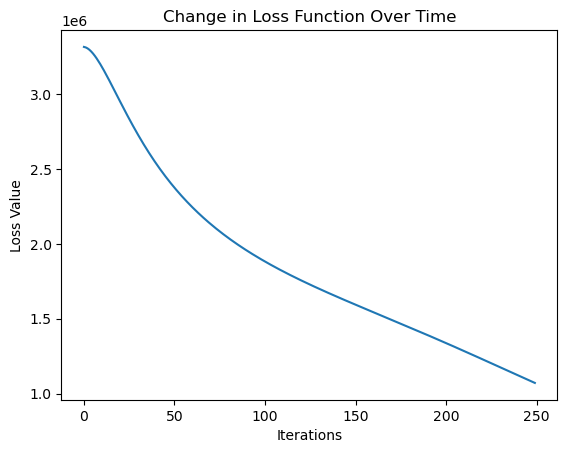

testing
MAE: 3.9994118213653564


In [12]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torch.autograd import Variable

trainData = pd.read_csv('ml100k.train.rating', header=None, names=['user', 'item', 'rate'], sep='\t')
testData = pd.read_csv('ml100k.test.rating', header=None, names=['user', 'item', 'rate'], sep='\t')

userIdx = trainData.user.values
itemIdx = trainData.item.values
rates = trainData.rate.values

K = 20
lambd = 0.00001
learning_rate = 1e-6

U = torch.randn([len(set(userIdx)), K], requires_grad=True)
P = torch.randn([len(set(itemIdx)), K], requires_grad=True)

optimizer = torch.optim.SGD([U, P], lr=learning_rate, momentum=0.9)

# Lists to store loss values for visualization
loss_values = []

# Training loop
for i in range(250):
    # Compute predictions
    R = torch.mm(U, P.t())
    ratesPred = torch.gather(R.view(1, -1)[0], 0, Variable(torch.LongTensor(userIdx * len(set(itemIdx)) + itemIdx)))
    diff_op = ratesPred - Variable(torch.FloatTensor(rates))
    baseLoss = diff_op.pow(2).sum()

    # Regularization
    regularizer = lambd * (U.pow(2).sum() + P.pow(2).sum())

    # Loss function
    loss = baseLoss + regularizer

    # Backpropagation and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()
    optimizer.step()

    # Store loss value for visualization
    loss_values.append(loss.item())

    if i % 50 == 0:
        print('Iteration {}: loss = {}'.format(i, loss.item()))

# Plot the change in the loss function over time
plt.plot(range(250), loss_values)
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.title('Change in Loss Function Over Time')
plt.show()

# Your getMAE function and testing
def getMAE():
    userIdx = testData.user.values
    itemIdx = testData.item.values
    rates = testData.rate.values
    R = torch.mm(U, P.t())
    ratesPred = torch.gather(R.view(1, -1)[0], 0, Variable(torch.LongTensor(userIdx * len(set(itemIdx)) + itemIdx)))
    diff_op = ratesPred - Variable(torch.FloatTensor(rates))
    MAE = diff_op.abs().mean()
    return MAE.data.item()

print('testing')
print('MAE:', getMAE())

